In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
# Load dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [4]:
# Select features: Annual Income and Spending Score
X = dataset.iloc[:, 3:5].values

In [5]:
# Standardize features (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Apply DBSCAN
db_model = DBSCAN(eps=0.5, min_samples=5)
label = db_model.fit_predict(X_scaled)

In [7]:
# Add cluster labels to the original dataset
supervised = pd.DataFrame(dataset)
supervised['Cluster_group'] = label

In [8]:
# Save clustered data
supervised.to_csv("dbscan_clusters.csv", index=False)

C:\Users\Priyan\anaconda3\envs\aiml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


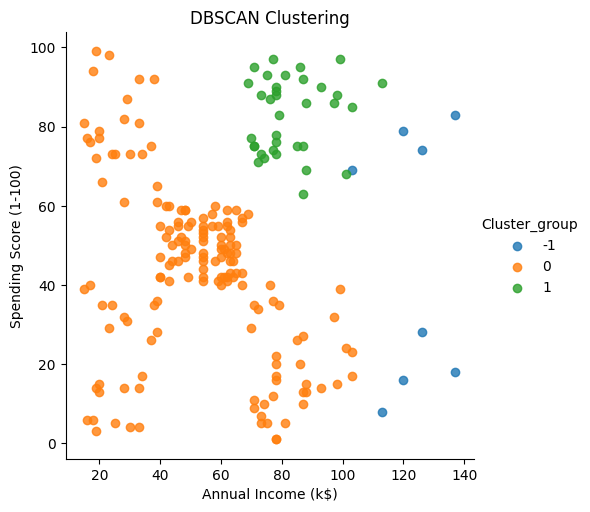

In [9]:
# Visualize clusters
sns.lmplot(data=supervised, 
           x=supervised.columns[3], 
           y=supervised.columns[4], 
           hue='Cluster_group', 
           fit_reg=False, 
           legend=True, 
           legend_out=True)

plt.title('DBSCAN Clustering')
plt.show()

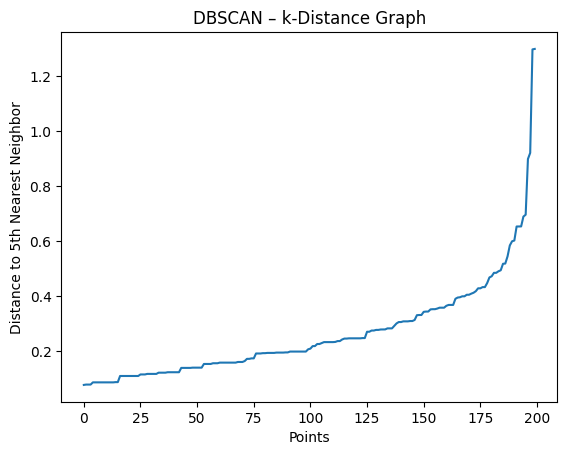

In [10]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.title('DBSCAN – k-Distance Graph')
plt.xlabel('Points')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.show()